# Example on Knapsack Problem

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os

os.chdir('..')

In [2]:
%load_ext autoreload
%autoreload 2

# Problem Statement

In [3]:
seed = 47
np.random.seed(seed)

num_person = 50
num_location = 10 

person_x = np.random.random((num_person,))
person_y = np.random.random((num_person,))
location_x = np.random.random((num_location,))
location_y = np.random.random((num_location,))

In [4]:
from algen.trainer import Trainer
from algen.selection import TournamentSelection
from algen.crossover import UniformCrossover
from algen.mutation import IntegerMutation

num_generations = 100
pop_size = 500
crossover_rate = 0.9
mutation_rate = 0.2

selection = TournamentSelection(tournament_size=5)
crossover = UniformCrossover()
mutation = IntegerMutation()

def fitness(chromosome):
    loc_index = chromosome.genotype
    dx = location_x[loc_index] - person_x
    dy = location_y[loc_index] - person_y
    dist = np.sqrt(np.square(dx) + np.square(dy))
    return 1. / dist.sum()

trainer = Trainer(
    chromosome_type='integer',
    chromosome_length=num_person,
    fitness_function=fitness,
    min_value=0,
    max_value=num_location-1,
    pop_size=pop_size,
    selection=selection,
    crossover_rate=crossover_rate,
    mutation_rate=mutation_rate,
    crossover=crossover,
    mutation=mutation,
    seed=seed
)

history = trainer.run(num_generations=num_generations, verbose=1)

Best generation : 26
Best fitness    : 0.09564660697307548
Best chromosome : array([3, 4, 1, 8, 1, 5, 0, 7, 5, 3, 3, 2, 6, 2, 6, 6, 8, 5, 8, 8, 5, 3,
       5, 3, 5, 4, 0, 5, 0, 3, 6, 3, 3, 1, 5, 5, 5, 8, 8, 0, 0, 8, 3, 8,
       8, 6, 6, 5, 6, 0])
Finished in 0:00:02 (avg 0.02s/generation)


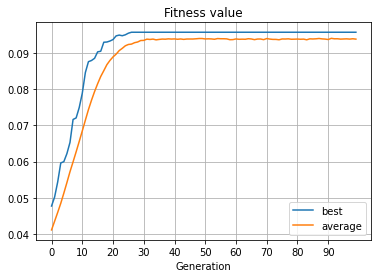

In [5]:
best = history.best_fitness_each_gen()
average = history.average_fitness_each_gen()
generation = history.generation

plt.plot(best, label='best')
plt.plot(average, label='average')

plt.xticks(generation[::10])
plt.grid()
plt.legend()
plt.xlabel('Generation')
plt.title('Fitness value')
plt.show()